## Dictionaries 2 Worksheet

### Part 1 - Dictionaries vs. Lists

In the previous class on Dictionaries, we looked at lists of dictionaries, like the following:

In [5]:
#Print multiple outputs from a cell
get_ipython().ast_node_interactivity = 'all'

In [1]:
stud_list = [
    {'id': 87654321, 'homework': [10,9,9,10,7,8], 'exams': [91,86,92] },
    {'id': 12345678, 'homework': [9,9,9,8,8,10], 'exams': [87,90,89] },
    {'id': 23344556, 'homework': [7,8,8,7,8,6], 'exams': [82,78,77] }
]

Another way to organize this data would be to create a dictionary where each student's ID is a key and the value is another dictionary containing that student's homework and test scores, like the following:

In [2]:
stud_dict = {
    '87654321': {'homework': [10, 9, 9, 10, 7, 8], 'exams': [91, 86, 92]},
    '12345678': {'homework': [9, 9, 9, 8, 8, 10], 'exams': [87, 90, 89]},
    '23344556': {'homework': [7, 8, 8, 7, 8, 6], 'exams': [82, 78, 77]}
}

What's the difference between both ways of organizing this data? 

For one, it's a bit more difficult to access a particular student's information with a list. Let's say we want the exam scores for the student whose ID is 23344556. With a list, we'd need to know that that's the 3rd student (who's at index location 2):

In [3]:
print(stud_list[2]['exams'])

[82, 78, 77]


With the dictionary, we can just call up the student's information using their ID:

In [4]:
print(stud_dict['23344556']['exams'])

[82, 78, 77]


And what if you didn't know whether that particular student was in the list (e.g., if it were a long list of student IDs). Here's how you'd have to search:

In [6]:
id_search = int(input('Enter a student ID to search for: '))

for student in stud_list:
    if student['id'] == id_search:
        found = 'yes'
        break
    else:
        found = 'no'
        
if found == 'yes':
    print('The student is in the list')
else:
    print('The student is not in the list')

Enter a student ID to search for:  2344556


The student is not in the list


It's a bit easier to do this with dictionaries, because we don't need to do a 'for' loop. We can just write an if statement to see if the ID number is a key in the dictionary:

In [8]:
id_search = input('Enter a student ID to search for: ')
if id_search in stud_dict:
    print('The student is in the dictionary')
else:
    print('The student is not in the dictionary')

Enter a student ID to search for:  23456


The student is not in the dictionary


### Part 2 - Building a Dictionary of Dictionaries

Let's build one of these dictionaries (of dictionaries). First, in part 2, we'll build it step-by-step and then, in part 3, we'll automate the process. The data we're using is from a text file called, vote_information.txt. Make sure that you've downloaded this file and placed it in the same folder as this jupyter notebook file.

Here's a snapshot of the first 7 lines:

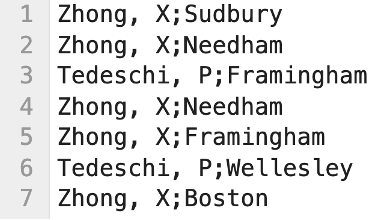

First, create an empty dictionary called *votes*:

In [9]:
votes = {}

Now, we're going to add the data a line at a time until we start to get something that looks like this:

```
votes = {
    'Zhong, X': {'Sudbury': 1, 'Needham': 2, 'Framingham': 1, 'Boston': 1},
    'Tedeschi, P': {'Framingham': 1, 'Wellesley': 1}
}
```
Remember, to add a new key to a dictionary, you just simply use an assignment statement. Go ahead and add the information from line 1...you want to add a key to the *votes* dictionary called 'Zhong, X' that has, as its value, another dictionary with a key for 'Sudbury' and a starting value of 1:

In [46]:
votes['Zhong, X'] = {'Sudbury': 1}
votes

{'Zhong, X': {'Sudbury': 1}, 'Tedeschi, P': {'Framingham': 1}}

Now you need to add in the vote for 'Zhong, X' from Needham. *Hint: You already have 'Zhong, X' as one of your dictionary keys, so you'll have to write this assignment statement differently.*

In [47]:
votes['Zhong, X']['Needham'] = 1
votes

{'Zhong, X': {'Sudbury': 1, 'Needham': 1}, 'Tedeschi, P': {'Framingham': 1}}

Line 3 has the first vote for candidate 'Tedeschi, P' from Framingham. Go ahead and add his vote to the *votes* dictionary:

In [48]:
votes['Tedeschi, P'] = {'Framingham': 1}
votes

{'Zhong, X': {'Sudbury': 1, 'Needham': 1}, 'Tedeschi, P': {'Framingham': 1}}

Line 4 now has a 2nd vote for 'Zhong, X' from Needham. Update the dictionary...but don't just write over the 1 with a 2...add 1 to the current value for 'Zhong, X' from Needham. (We'll be automating this process in part 3, so I want you to get a sense of how we'll need to do this.)

In [49]:
votes['Zhong, X']['Needham'] += 1
votes

{'Zhong, X': {'Sudbury': 1, 'Needham': 2}, 'Tedeschi, P': {'Framingham': 1}}

At this point, you should have a dictionary that looks like this:

```
{'Zhong, X': {'Sudbury': 1, 'Needham': 2}, 'Tedeschi, P': {'Framingham': 1}}
```

### Part 3 - Automating the Process

Now let's write some code that takes the vote_information.txt file and turns it into a dictionary like the one we were manually creating above.

To help with this, think through what you did in part 2. For each line of vote data, you did one of 3 things:
1. If the candidate wasn't in the *votes* dictionary, you added them, along with their first vote recorded in a dictionary specific to the candidate
2. If the candidate was in the *votes* dictionary, but the town wasn't listed yet, you added that town with the initial vote to the candidate's dictionary
3. If both the candidate and town were listed, you added 1 to the town's votes for that candidate

Let's write some code to do this in a 'for' loop. I've started the code for you to load in the vote_information text file and start the loop. Your goal is to build out the *votes* dictionary and then print out the results as follows:

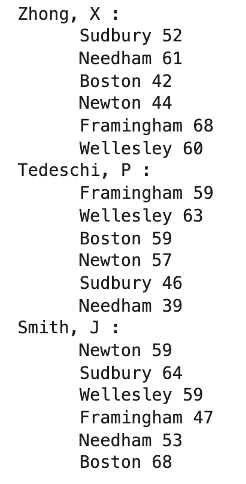

In [29]:
f = open('vote_information.txt', 'r')

votes = {}

for line in f:
    line = line.rstrip('\n')     
    candidate, city = line.split(';')

    if candidate not in votes:
        votes[candidate] = {city : 1}
    elif city not in votes[candidate]:
        votes[candidate][city] = 1
    else:
        votes[candidate][city] += 1
    
    #votes['Zhong, X'] = {'Sudbury': 1}
    #votes['Zhong, X']['Needham'] = 1
    #votes['Tedeschi, P'] = {'Framingham': 1}
    #votes['Zhong, X']['Needham'] += 1

f.close()

### Now, write some code to print the vote counts by town for each candidate:
for cand_key in votes:
    print(cand_key, ':')
    for town, count in votes[cand_key].items():
        print('     ', town, count)

Zhong, X :
      Sudbury 52
      Needham 61
      Framingham 68
      Boston 42
      Newton 44
      Wellesley 60
Tedeschi, P :
      Framingham 59
      Wellesley 63
      Boston 59
      Newton 57
      Sudbury 46
      Needham 39
Smith, J :
      Newton 59
      Sudbury 64
      Wellesley 59
      Framingham 47
      Needham 53
      Boston 68


### Coda

Now that you've created the *votes* dictionary, create a function called *voteinfo* that takes two arguments, a string containing the candidate's name and a string containing a city in Massachusetts. Your function should return a message giving the vote total for that candidate from that city, as well as the total vote count for the candidate. If the candidate name is not in the dictionary, a message should return stating that the person was not a candidate and, if the city is not listed for a candidate in the dictionary, the message should state that they received no votes from that city.

```
voteinfo('Zhong, X', 'Newton') would return 'Zhong, X received 44 votes from Newton out of a total 327 votes cast'
voteinfo('Pan, S', 'Newton') would return 'Pan, S was not a candidate in this election'
voteinfo('Zhong, X', 'Watertown') would return 'Zhong, X received no votes from Watertown out of a total 327 votes cast'
```

In [38]:
def voteinfo(candidate, city):
    for count in candidate:
        tot_votes = tot_votes + votes[city]
    
    return print(f"{candidate} received {votes[city]} from {city} out of a total {tot_votes} votes cast.")

voteinfo('Zhong, X', 'Newton')

UnboundLocalError: local variable 'tot_votes' referenced before assignment